<a href="https://colab.research.google.com/github/bombom93/bigcontest/blob/master/inkyun/%EC%8B%9C%EC%B2%AD%EB%A5%A0_%EC%9B%94%EB%B3%84%2C_%EC%9A%94%EC%9D%BC%EB%B3%84_%2B_%EB%86%8D%EC%88%98%EC%B6%95%26%EC%9D%B4%EB%AF%B8%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 한글 깨짐 처리
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 import datetime
# dt = datetime.datetime(2019,1,1)
# end = datetime.datetime(2019,12,31)
# step = datetime.timedelta(date=1)

# result = []

# while dt < end:
#   result.append(dt.strtime('%Y-%m-%d'))
#   dt += step



In [ ]:
pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/data_information/bigcontest_rate_train.xlsx', header=1, index_col = '시간대', skipfooter=1).drop(columns='2019-01-01 to 2019-12-31')

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,...,2019-11-22,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-14,2019-12-15,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02:00,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,0.023,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.048,0.0,0.0,0.0,0.000,0.018,0.000,0.035,0.030,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:01,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,0.023,...,0.000,0.0,0.0,0.0,0.0,0.000,0.022,0.000,0.0,0.0,0.000,0.048,0.0,0.0,0.0,0.000,0.018,0.000,0.035,0.030,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.012
02:02,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,0.023,...,0.000,0.0,0.0,0.0,0.0,0.000,0.022,0.000,0.0,0.0,0.000,0.033,0.0,0.0,0.0,0.000,0.018,0.018,0.035,0.067,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:03,0.0,0.0,0.014,0.0,0.000,0.0,0.0,0.0,0.000,0.005,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,0.023,...,0.000,0.0,0.0,0.0,0.0,0.000,0.022,0.000,0.0,0.0,0.000,0.033,0.0,0.0,0.0,0.000,0.018,0.018,0.035,0.067,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
02:04,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,0.023,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.012,0.033,0.0,0.0,0.0,0.000,0.018,0.000,0.035,0.067,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:55,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,0.000,0.0,0.0,0.000,0.0,0.005,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.021,0.0,0.0,0.0,0.0,0.0,0.0,0.039,0.000,0.032,0.000,...,0.006,0.0,0.0,0.0,0.0,0.022,0.000,0.013,0.0,0.0,0.033,0.000,0.0,0.0,0.0,0.058,0.000,0.036,0.031,0.000,0.000,0.0,0.000,0.0,0.0,0.009,0.0,0.0,0.036,0.0,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:56,0.0,0.0,0.000,0.0,0.027,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.005,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.045,0.000,0.032,0.000,...,0.006,0.0,0.0,0.0,0.0,0.000,0.000,0.013,0.0,0.0,0.033,0.000,0.0,0.0,0.0,0.070,0.000,0.036,

In [ ]:
# 데이터 읽어오기
rate = pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/data_information/bigcontest_rate_train.xlsx', header=1, index_col = '시간대', skipfooter=1).drop(columns='2019-01-01 to 2019-12-31')

In [ ]:
rate

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,...,2019-11-22,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-14,2019-12-15,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02:00,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,0.023,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.048,0.0,0.0,0.0,0.000,0.018,0.000,0.035,0.030,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:01,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,0.023,...,0.000,0.0,0.0,0.0,0.0,0.000,0.022,0.000,0.0,0.0,0.000,0.048,0.0,0.0,0.0,0.000,0.018,0.000,0.035,0.030,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.012
02:02,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,0.023,...,0.000,0.0,0.0,0.0,0.0,0.000,0.022,0.000,0.0,0.0,0.000,0.033,0.0,0.0,0.0,0.000,0.018,0.018,0.035,0.067,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:03,0.0,0.0,0.014,0.0,0.000,0.0,0.0,0.0,0.000,0.005,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,0.023,...,0.000,0.0,0.0,0.0,0.0,0.000,0.022,0.000,0.0,0.0,0.000,0.033,0.0,0.0,0.0,0.000,0.018,0.018,0.035,0.067,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
02:04,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,0.023,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.012,0.033,0.0,0.0,0.0,0.000,0.018,0.000,0.035,0.067,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:55,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,0.000,0.0,0.0,0.000,0.0,0.005,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.021,0.0,0.0,0.0,0.0,0.0,0.0,0.039,0.000,0.032,0.000,...,0.006,0.0,0.0,0.0,0.0,0.022,0.000,0.013,0.0,0.0,0.033,0.000,0.0,0.0,0.0,0.058,0.000,0.036,0.031,0.000,0.000,0.0,0.000,0.0,0.0,0.009,0.0,0.0,0.036,0.0,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:56,0.0,0.0,0.000,0.0,0.027,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.005,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.045,0.000,0.032,0.000,...,0.006,0.0,0.0,0.0,0.0,0.000,0.000,0.013,0.0,0.0,0.033,0.000,0.0,0.0,0.0,0.070,0.000,0.036,

In [ ]:
# 분 단위 데이터 시간 단위로 변환 후 데이터프레임으로 리턴
temp = []
def integrate_rate(data, unit=60, operation = 'sum'):
  n_rows = int(len(data.index) / unit) # -> 24

  column_names = data.columns
  index_names =  np.arange(0,24,1)+2
  range_ = np.arange(0,1440,60)

  if operation == 'sum':  
    for _, j in enumerate(range_):
      temp.append(data[j:j+unit].sum(axis=0))

    data_array = np.array(temp)

    return pd.DataFrame(data=data_array, index = index_names, columns = column_names)[4:]

  # elif operation == 'mode':
  #   for j in range_:
  #     data[j:j+unit].sum(axis=0)

In [ ]:
# 분 단위 데이터 시간 단위로 변환 후 데이터프레임으로 리턴
def integrate_rate(data, unit=60, operation = 'sum'):
  n_rows = int(len(data.index) / unit) # -> 24

  column_names = data.columns
  index_names =  np.arange(0,24,1)+2
  range_ = np.arange(0,1440,60)

  if operation == 'sum':  
    for _, j in enumerate(range_):
      temp.append(data[j:j+unit].sum(axis=0))

    data_array = np.array(temp)

    return pd.DataFrame(data=data_array, index = index_names, columns = column_names)[4:]

  # elif operation == 'mode':
  #   for j in range_:
  #     data[j:j+unit].sum(axis=0)

In [ ]:
rate = integrate_rate(rate)

In [ ]:
# 그래프 그리기
# 예시 - myplot1(rate, 0, 'hour') -> x축이 '시간'인 모든 월요일의 그래프
d = ['MON','TUE','WED','THU','FRI','SAT','SUN']
x = ['hour','month']

def myplot1(data, day, x_axis): # 0부터 월요일/ x_axis = 'hour' or 'month'
  if x_axis == 'hour':
    x_axis = 0
  elif x_axis == 'month':
    x_axis = 1
  else:
    raise ValueError('Enter valid value')
  plt.figure(figsize=(6,4))
  by_hour = integrate_rate(data).T
  by_hour.index  = pd.to_datetime(by_hour.index)
  day_ = [7,1,2,3,4,5,6]
  
  plt.plot(by_hour.resample('D').interpolate()[day_[day]::7].mean(axis=x_axis))
  plt.title('x_axis: {}, {}'.format(x[x_axis],d[day]))

In [ ]:
# 그래프 그리기
# 예시 - myplot1(rate, 0, 'hour') -> x축이 '시간'인 모든 월요일의 그래프
d = ['MON','TUE','WED','THU','FRI','SAT','SUN']
x = ['hour','month']

def myplot2(data, day, x_axis): # 0부터 월요일/ x_axis = 'hour' or 'month'
  if x_axis == 'hour':
    x_axis = 0
  elif x_axis == 'month':
    x_axis = 1
  else:
    raise ValueError('Enter valid value')
  plt.figure(figsize=(6,4))
  by_hour = integrate_rate(data).T
  by_hour.index  = pd.to_datetime(by_hour.index)
  day_ = [7,1,2,3,4,5,6]
  
  plt.plot(by_hour.resample('D').interpolate()[day_[day]::7].sum(axis=x_axis))
  plt.title('x_axis: {}, {}'.format(x[x_axis],d[day]))

In [ ]:
rate.shape

(20, 365)

In [ ]:
# 농수축 & 이미용 EDA

In [ ]:
df = pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/data_information/bigcontest_record_train.xlsx', header=1)
features = ['broadcast', 'exp_min', 'm_code', 'p_code', 'p_name', 'p_group', 'unit_price', 'total_price']
df.columns=features
df['sales_amount'] = round(df['total_price'] / df['unit_price'],1)

df['broadcast'] = df['broadcast'].astype('datetime64[ns]')
df['weekday'] = df.broadcast.dt.weekday + 1 # 월요일:1, 일요일:7
df['month'] = df.broadcast.dt.month
df['day'] = df.broadcast.dt.day
df['hour'] = df.broadcast.dt.hour
df['quarter'] = df.broadcast.dt.quarter

In [ ]:
df

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales_amount,weekday,month,day,hour,quarter
0,2019-01-01 06:00:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.6,2,1,1,6,1
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.5,2,1,1,6,1
2,2019-01-01 06:20:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.8,2,1,1,6,1
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.3,2,1,1,6,1
4,2019-01-01 06:40:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.2,2,1,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,NaN,3,1,1,0,1
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,NaN,3,1,1,0,1
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,NaN,3,1,1,1,1
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN,NaN,3,1,1,1,1


In [ ]:
nsc_df = df[df['p_group'] == '농수축']
emy_df = df[df['p_group'] == '이미용']

In [ ]:
df2 = pd.merge(nsc_df,emy_df,how='outer')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5189 entries, 0 to 5188
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   broadcast     5189 non-null   datetime64[ns]
 1   exp_min       4979 non-null   float64       
 2   m_code        5189 non-null   int64         
 3   p_code        5189 non-null   int64         
 4   p_name        5189 non-null   object        
 5   p_group       5189 non-null   object        
 6   unit_price    5189 non-null   int64         
 7   total_price   5189 non-null   float64       
 8   sales_amount  5189 non-null   float64       
 9   weekday       5189 non-null   int64         
 10  month         5189 non-null   int64         
 11  day           5189 non-null   int64         
 12  hour          5189 non-null   int64         
 13  quarter       5189 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(8), object(2)
memory usage: 608.1+ KB


In [ ]:
nsc_nan_df = df2[(df2['exp_min'].isnull() == True)&(df2['p_group']=='농수축')]
emy_nan_df = df2[(df2['exp_min'].isnull() == True)&(df2['p_group']=='이미용')]
print('농수축 exp_min 결측치 수:',nsc_nan_df.exp_min.isnull().sum(), '개',
      '\n이미용 exp_min 결측치 수:',emy_nan_df.exp_min.isnull().sum(), '개')

농수축 exp_min 결측치 수: 175 개 
이미용 exp_min 결측치 수: 35 개


In [ ]:
type_nsc = nsc_df.p_name.unique()
type_emy = emy_df.p_name.unique()
no_type_nsc = len(type_nsc)
no_type_emy = len(type_emy)

print('농수축 상품군의 상품 종류는 {}개'.format(no_type_nsc),
      '\n이미용 상품군의 상품 종류는 {}개'.format(no_type_emy))

농수축 상품군의 상품 종류는 140개 
이미용 상품군의 상품 종류는 54개


In [ ]:
print('농수축 상품코드 개수: ',len(nsc_df.p_code.unique()), '농수축 마더코드 개수',len(nsc_df.m_code.unique()))
print('이미용 상품코드 개수: ',len(emy_df.p_code.unique()), '이미용 마더코드 개수',len(emy_df.m_code.unique()))

농수축 상품코드 개수:  152 농수축 마더코드 개수 102
이미용 상품코드 개수:  64 이미용 마더코드 개수 42


In [ ]:
df2[df2['exp_min'] > 20].shape

(40, 14)

In [ ]:
print('농수축 exp_min >20인 상품:', nsc_df[nsc_df.exp_min > 20].p_name.unique())
print('이미용 exp_min >20인 상품:', emy_df[emy_df.exp_min > 20].p_name.unique())

농수축 exp_min >20인 상품: ['이경제원장의 더 힘찬 선식 100, 13박스+쉐이커통']
이미용 exp_min >20인 상품: ['스포메틱스 네츄럴 선스틱' '[살롱클리닉]샤이닝 트리트먼트 헤어컬러크림세트' '바바코코 젤네일스트립 SET']


In [ ]:
print('농수축 exp_min <20인 상품:', nsc_df[nsc_df.exp_min < 20].p_name.unique())
print('이미용 exp_min <20인 상품:', emy_df[emy_df.exp_min < 20].p_name.unique())

농수축 exp_min <20인 상품: ['(a4)팽현숙의 순대 곱창 전골&볶음' '제주 한라봉2박스+천혜향1박스' '국내산 손질갑오징어 8팩' '영산포숙성 홍어 13팩'
 '제주바다 7분 손질문어' '옛날 그 쥐포 110장 (11팩)' '청정수산 완도활전복세트(20미+간장전복장2통)'
 '영산포숙성 홍어8팩+무침3통' '청정수산 완도활전복 35미' '영광 生 모시떡 100개!!(동부기피70개+검정깨30개)'
 '사용불가미리구운 자연산 바다장어 9팩' '고칼슘검은콩두유48팩+호두아몬드 두유48팩' '하늘내린 용대리황태10마리'
 '김정문의 섬진강 재첩국 11팩 3.3kg' '피시원 국내산 절단 햇 꽃게 7팩' '국내산 손질 병어 26미'
 '국내산 손질 갑오징어 9팩' '피시원 국내산 절단 햇 꽃게 2.4kg' '완도꼬마활전복 1.3kg'
 '국내산 영산포숙성 홍어 6팩+홍어무침1통' '국내산 손질 햇 갑오징어 9팩' '통뼈 감자탕 8팩' '고창 꿀 고구마 10kg'
 '완도산 식탁앤김 120봉']
이미용 exp_min <20인 상품: ['마리끌레르 파리컬렉션 리얼 하이드로 립스틱(리뉴얼)' '스포메틱스 리얼핏 모이스춰라이징 코코넛크림'
 '비버리힐스폴로클럽 남성기초세트(2018FW골드)' '비버리힐스폴로클럽 남성기초세트(골드+플라)'
 '에이유플러스 슈퍼선스틱 1001(쇼퍼백)' 'NEW프리미엄 TS샴푸세트(추가)' '스포메틱스 트리플 샤이닝 쿠션(이데베논앰플)'
 '자올 닥터스오더 탈모 부스터&샴푸' '스포메틱스 트리플 샤이닝 쿠션시즌1' '바바코코 젤네일스트립 SET'
 '엘로엘 아쿠아클린 마스크' '아미니 비노테라 오일 워시(구성1)' '마리끌레르 파리컬렉션 리얼 하이드로 립스틱(마스카라)'
 '엘렌실라 에스까르고에센스 커버쿠션' '블링썸 아이스타일러SET' '엘렌실라&코즈미 쑥클렌져' '뉴웨이 볼륨브러쉬'
 '실크테라피 오리지널 에센스 패키지' '비버리힐스폴로클럽 남성기초세트(골드+콜라겐)' '메디앤서 생콜라겐 마스크팩'
 '아이앤아이 퀵래쉬 속눈썹세트

In [ ]:
nsc_nan = nsc_df[nsc_df['exp_min'].isnull()]['p_name'].unique()
emy_nan = emy_df[emy_df['exp_min'].isnull()]['p_name'].unique()
print(nsc_nan)
print('\n',emy_nan)
print('\n위 상품들은 노출(분)이 NaN값임.')

# 35965 같은 데이터, 노출이 3인데 나머지 17은 어디로?

['SPC삼립 한입 호빵 13봉(단일, 팥 13봉)' '구워만든 곡물그대로 21, 오리지널 10봉' '국내산 특大손질갑오징어 6팩'
 '영광 生 모시떡 90개+찰보리식혜(동부기피70개+검정깨20개)'
 ' [맛있는 제주]손질 생선 3대세트+흑돼지구이(광어+갈치+고등어' '깐깐송도순 포기김치 8kg+ 백김치 2kg'
 '더커진거창특등급사과 5kg+5kg' 'AAC 한우소머리 곰탕' 'AAC 한우소머리양곰탕']

 ['NEW프리미엄 TS샴푸/트리트먼트(추가)' '아미니 비노테라 오일 워시(구성2)' '코튼플러스 클렌징패드(더블)'
 '(무이자)엘렌실라&코즈미 쑥클렌져(단하루)']

위 상품들은 노출(분)이 NaN값임.


In [ ]:
nsc_df[['p_name','unit_price']].describe()

,unit_price
count,3884.000000
mean,46419.541710
std,12736.003935
min,28900.000000
25%,36900.000000
50%,43900.000000
75%,55900.000000
max,109900.000000


In [ ]:
emy_df[['p_name','unit_price']].describe()

,unit_price
count,1305.000000
mean,51030.038314
std,12597.309045
min,39800.000000
25%,39800.000000
50%,39900.000000
75%,59800.000000
max,79900.000000


In [ ]:
df2.drop('broadcast',axis=1, inplace = True)
df2

,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales_amount,weekday,month,day,hour,quarter
0,20.0,100496,201497,뽕셰프 이봉원 특갈비탕 12팩,농수축,60900,14113000.0,231.7,2,1,1,15,1
1,20.0,100496,201497,뽕셰프 이봉원 특갈비탕 12팩,농수축,60900,32395000.0,531.9,2,1,1,15,1
2,20.0,100496,201497,뽕셰프 이봉원 특갈비탕 12팩,농수축,60900,39669000.0,651.4,2,1,1,15,1
3,20.0,100322,201479,국내산 손질갑오징어 8팩,농수축,49900,60787000.0,1218.2,2,1,1,16,1
4,20.0,100322,201479,국내산 손질갑오징어 8팩,농수축,49900,115457000.0,2313.8,2,1,1,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,20.0,100262,200876,더블모 어성초 샴푸,이미용,59800,30608000.0,511.8,1,12,30,12,4
5185,20.0,100262,200876,더블모 어성초 샴푸,이미용,59800,53553000.0,895.5,1,12,30,13,4
5186,20.0,100074,200199,비버리힐스폴로클럽 남성기초세트(골드+콜라겐),이미용,39800,51010000.0,1281.7,1,12,30,20,4
5187,20.0,100074,200199,비버리힐스폴로클럽 남성기초세트(골드+콜라겐),이미용,39800,73150000.0,1837.9,1,12,30,20,4


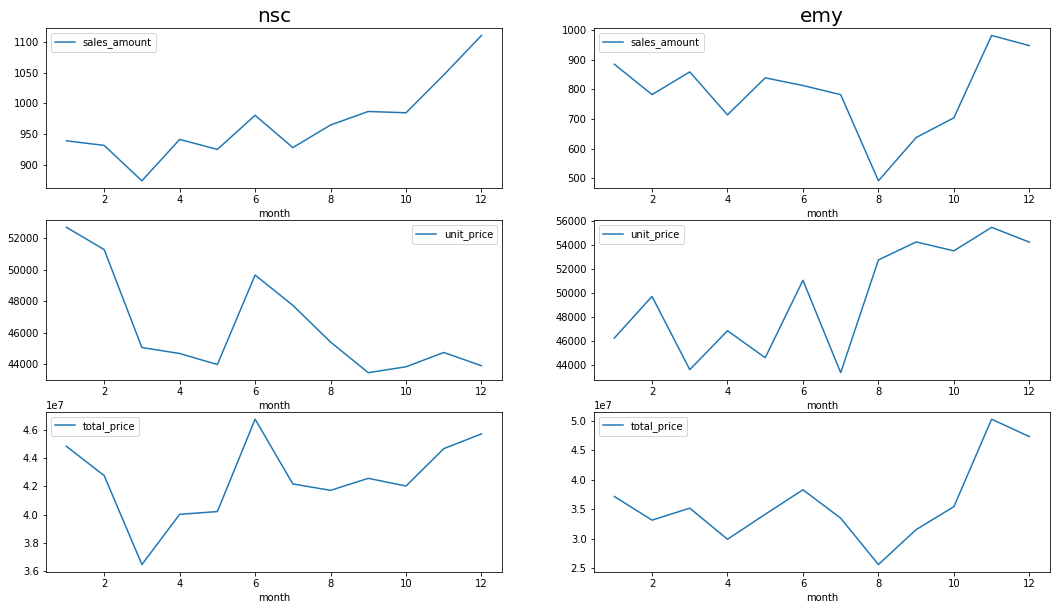

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(3,2, figsize = (18,10)) 

f1 = nsc_df[['month','total_price']].groupby('month').mean().plot(ax= ax[0,0])
f2 = emy_df[['month','total_price']].groupby('month').mean().plot(ax= ax[0,1])
f1.set_title('nsc', fontsize=20)
f2.set_title('emy', fontsize=20)

nsc_df[['month','unit_price']].groupby('month').mean().plot(ax= ax[1,0])
emy_df[['month','unit_price']].groupby('month').mean().plot(ax= ax[1,1])

nsc_df[['month','unit_price']].groupby('month').mean().plot(ax= ax[2,0])
emy_df[['month','unit_price']].groupby('month').mean().plot(ax= ax[2,1])

# 농수축 - 겨울에 단가는 낮아지나 판매량, 판매액은 증가한다.
#        - 초여름, 단가, 판매량, 판매액 모두 증가
#        - 2월 경, 단가는 높으나 실적(판매량, 판매액)은 저조하다.
# 이미용 - 여름에 단가,판매량,판매액 모두 낮아지는 경향
#        - 겨울에 모두 높아진다.


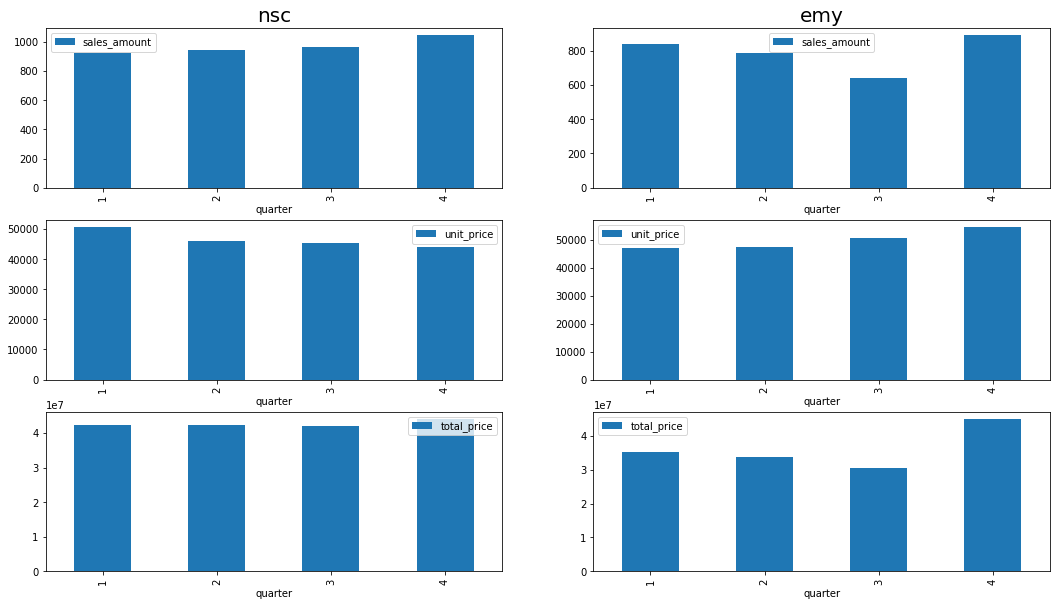

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(3,2, figsize = (18,10)) 

f1 = nsc_df[['quarter','sales_amount']].groupby('quarter').mean().plot(kind='bar',ax= ax[0,0])
f2 = emy_df[['quarter','sales_amount']].groupby('quarter').mean().plot(kind='bar',ax= ax[0,1])
f1.set_title('nsc', fontsize=20)
f2.set_title('emy', fontsize=20)

nsc_df[['quarter','unit_price']].groupby('quarter').mean().plot(kind='bar',ax= ax[1,0])
emy_df[['quarter','unit_price']].groupby('quarter').mean().plot(kind='bar',ax= ax[1,1])

nsc_df[['quarter','total_price']].groupby('quarter').mean().plot(kind='bar',ax= ax[2,0])
emy_df[['quarter','total_price']].groupby('quarter').mean().plot(kind='bar',ax= ax[2,1])

# 직관적이지가 않다.

In [ ]:
c  # nsc_nan_idx = []
# emy_nan_idx = []

# for i in range(df.shape[0]):
#   if (df.iloc[i]['p_name'] in nsc_nan):
#     nsc_nan_idx.append(i)
#   if (df.iloc[i]['p_name'] in emy_nan):
#     emy_nan_idx.append(i)

In [ ]:
# print(nsc_nan_idx)
# print(emy_nan_idx)

[114, 116, 118, 2293, 2295, 2297, 6089, 6091, 6093, 6425, 6427, 6429, 6626, 6628, 6630, 6944, 6946, 6948, 11097, 11099, 11101, 11663, 11665, 11667, 11886, 11888, 11890, 12131, 12133, 12135, 12328, 12330, 12332, 12657, 12659, 12661, 13038, 13040, 13042, 13187, 13189, 13191, 13308, 13310, 13312, 13430, 13432, 13434, 13791, 13793, 13795, 14216, 14218, 14220, 14890, 14892, 14894, 15236, 15238, 15240, 15877, 15879, 15881, 21432, 21434, 22152, 22154, 22156, 22379, 22381, 22383, 23083, 23085, 23087, 23174, 23176, 23178, 23709, 23711, 23713, 23798, 23800, 23802, 23823, 23825, 23827, 24193, 24195, 24197, 24489, 24491, 24493, 24686, 24688, 24690, 24850, 24852, 24854, 24892, 24894, 24896, 25143, 25145, 25147, 25219, 25221, 25223, 25393, 25395, 25397, 25501, 25503, 25505, 25761, 25763, 25765, 26041, 26043, 26045, 27559, 27561, 27563, 27975, 27977, 27979, 28611, 28613, 28615, 28751, 28753, 28755, 29151, 29153, 29155, 29514, 29516, 29518, 29588, 29590, 29742, 29744, 29746, 29943, 29945, 29947, 30059

In [ ]:

# pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


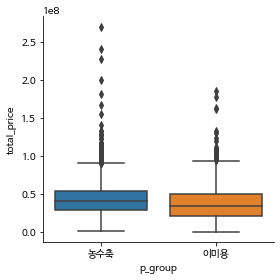

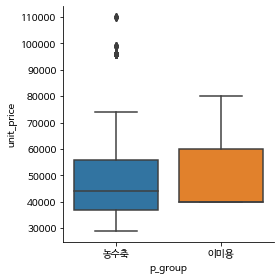

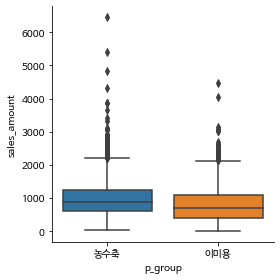

In [ ]:
# f, ax =plt.subplots(2,2,figsize=(20,15))
plt.rc('font', family='NanumBarunGothic')

sns.catplot(y='total_price', x='p_group', data=df2, kind='box', height = 4, ax=ax[0,0])
sns.catplot(y='unit_price', x='p_group', data=df2, kind='box', height = 4, ax=ax[0,1])
sns.catplot(y='sales_amount', x='p_group', data=df2, kind='box', height = 4, ax=ax[1,0])


# plt.rcParams['font.family'] = 'gulim'

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


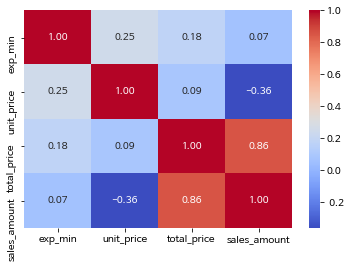

In [ ]:
sns.heatmap(nsc_df[['exp_min','unit_price','total_price','sales_amount']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


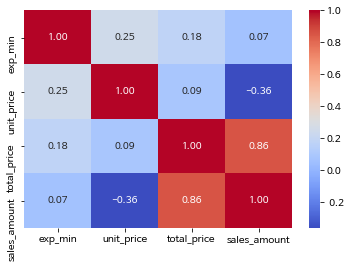

In [ ]:
sns.heatmap(nsc_df[['exp_min','unit_price','total_price','sales_amount']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

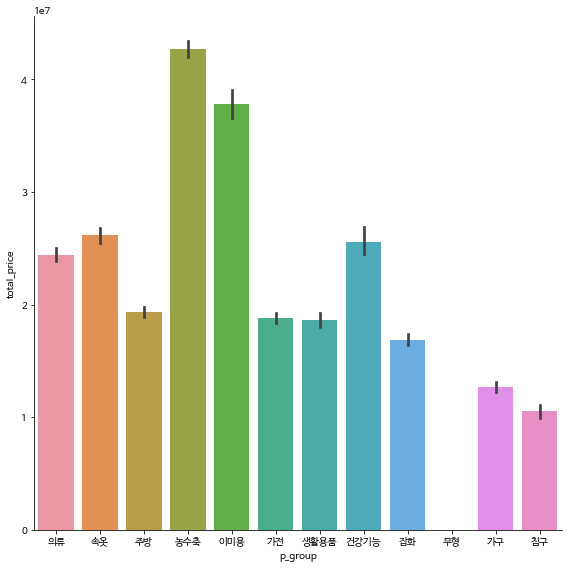

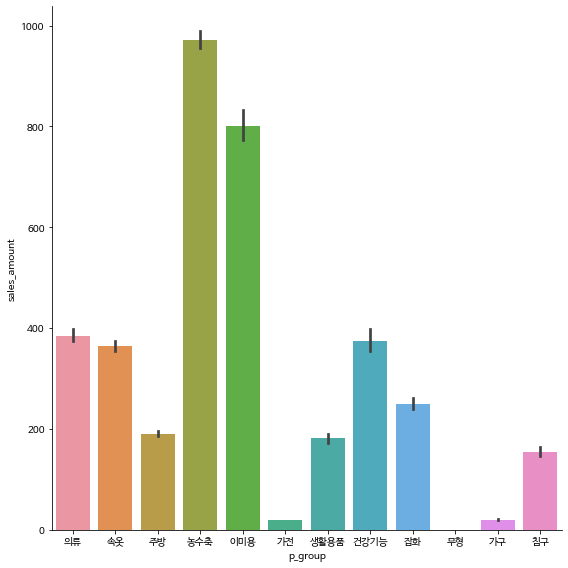

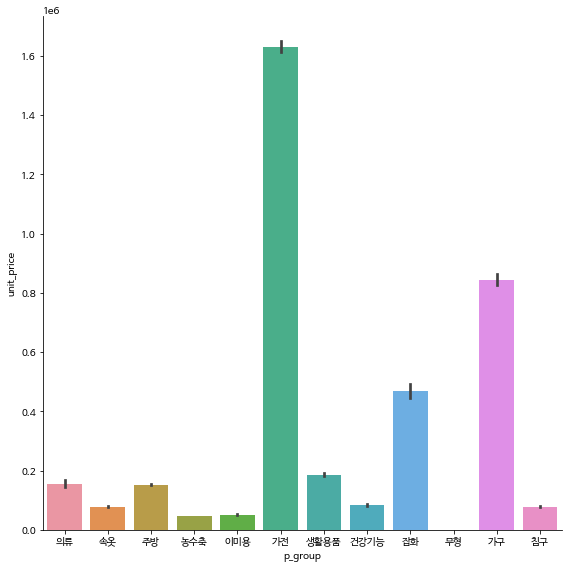

In [ ]:
sns.catplot(y='total_price', x='p_group', data=df, kind='bar', height = 8)
sns.catplot(y='sales_amount', x='p_group', data=df, kind='bar', height = 8)
sns.catplot(y='unit_price', x='p_group', data=df, kind='bar', height = 8)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may

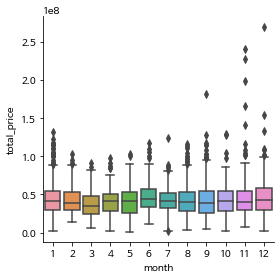

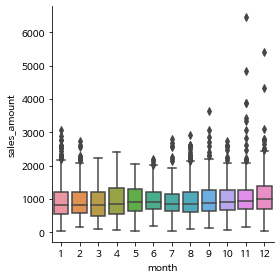

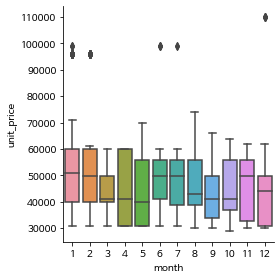

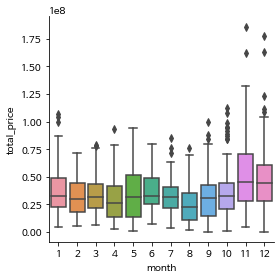

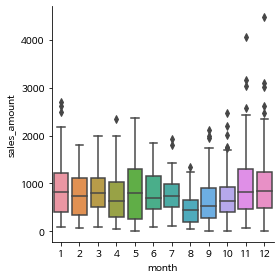

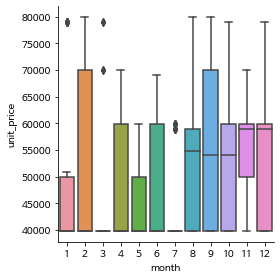

In [ ]:

sns.catplot(y='total_price', x='month', data=nsc_df, kind='box', height = 4, ax=ax[0,0])
sns.catplot(y='sales_amount', x='month', data=nsc_df, kind='box', height = 4, ax=ax[0,0])
sns.catplot(y='unit_price', x='month', data=nsc_df, kind='box', height = 4, ax=ax[0,0])

sns.catplot(y='total_price', x='month', data=emy_df, kind='box', height = 4, ax=ax[0,0])
sns.catplot(y='sales_amount', x='month', data=emy_df, kind='box', height = 4, ax=ax[0,0])
sns.catplot(y='unit_price', x='month', data=emy_df, kind='box', height = 4, ax=ax[0,0])



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may

count      3884.000000
mean      46419.541710
std       12736.003935
min       28900.000000
25%       36900.000000
50%       43900.000000
75%       55900.000000
max      109900.000000
Name: unit_price, dtype: float64

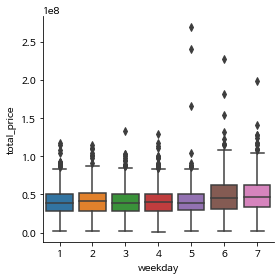

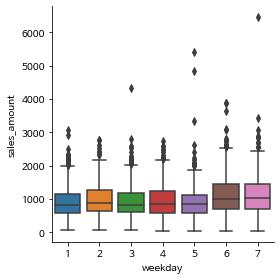

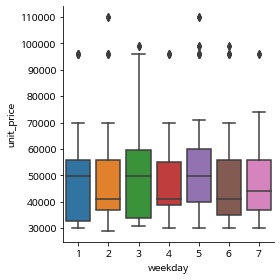

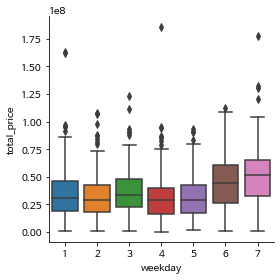

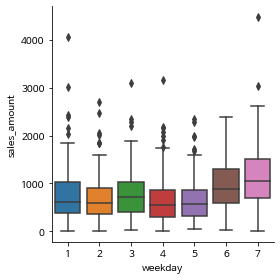

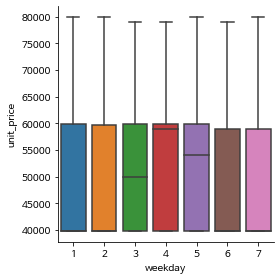

In [ ]:
sns.catplot(y='total_price', x='weekday', data=nsc_df, kind='box', height = 4, ax=ax[0,0])
sns.catplot(y='sales_amount', x='weekday', data=nsc_df, kind='box', height = 4, ax=ax[0,0])
sns.catplot(y='unit_price', x='weekday', data=nsc_df, kind='box', height = 4, ax=ax[0,0])

sns.catplot(y='total_price', x='weekday', data=emy_df, kind='box', height = 4, ax=ax[0,0])
sns.catplot(y='sales_amount', x='weekday', data=emy_df, kind='box', height = 4, ax=ax[0,0])
sns.catplot(y='unit_price', x='weekday', data=emy_df, kind='box', height = 4, ax=ax[0,0])
nsc_df['unit_price'].describe()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may

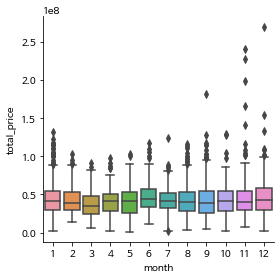

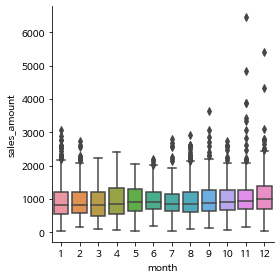

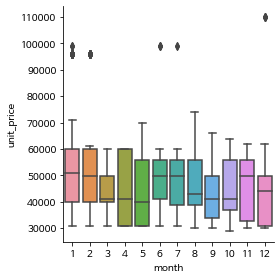

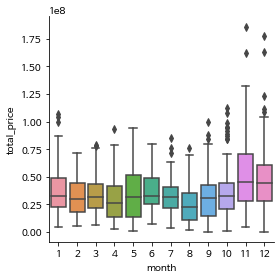

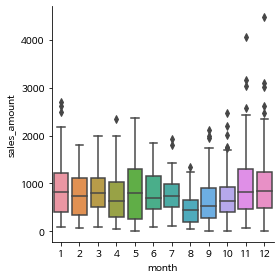

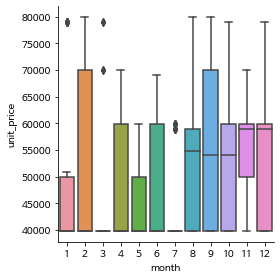

In [ ]:
sns.catplot(y='total_price', x='hour', data=nsc_df, kind='box', height = 4, ax=ax[0,0])
sns.catplot(y='sales_amount', x='hour', data=nsc_df, kind='box', height = 4, ax=ax[0,0])
sns.catplot(y='unit_price', x='hour', data=nsc_df, kind='box', height = 4, ax=ax[0,0])

sns.catplot(y='total_price', x='hour', data=emy_df, kind='box', height = 4, ax=ax[0,0])
sns.catplot(y='sales_amount', x='hour', data=emy_df, kind='box', height = 4, ax=ax[0,0])
sns.catplot(y='unit_price', x='hour', data=emy_df, kind='box', height = 4, ax=ax[0,0])
nsc_df['unit_price'].describe()

In [ ]:
emy_df[['month','unit_price']].groupby('month').describe() # 3월/ 7월 판매상품 살펴보기

unit_price                              ...                           
           count          mean           std  ...      50%      75%      max
month                                         ...                           
1           93.0  46232.258065  13164.215009  ...  39800.0  49900.0  79000.0
2           90.0  49710.000000  16654.149195  ...  39800.0  69900.0  79900.0
3           55.0  43596.363636  11001.144109  ...  39800.0  39900.0  79000.0
4           77.0  46845.454545  11499.479913  ...  39800.0  59800.0  69900.0
5           67.0  44594.029851   8056.878872  ...  39800.0  49900.0  59900.0
6           57.0  51054.385965  12363.094131  ...  39900.0  59800.0  69000.0
7           95.0  43344.210526   7526.417528  ...  39900.0  39900.0  59800.0
8           81.0  52755.555556  13182.924562  ...  54800.0  59000.0  79900.0
9          153.0  54256.862745  14040.738494  ...  54000.0  69900.0  79900.0
10         154.0  53514.935065  12736.750298  ...  54000.0  59900.0  79000.0
11         170.0  55477.647059  10379.843650  ...  59000.0  59900.0  69900.0
12         213.0  54240.375587  10009.272298  ...  59000.0  59800.0  79000.0

[12 rows x 8 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


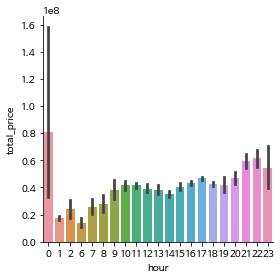

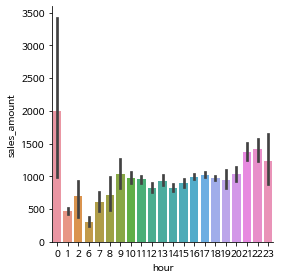

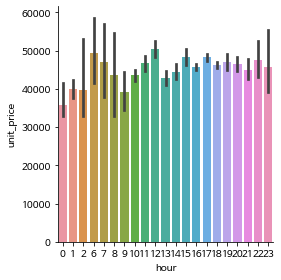

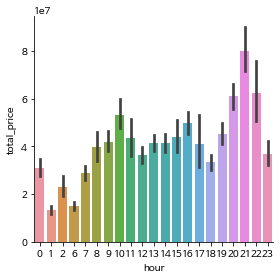

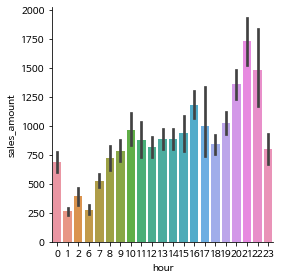

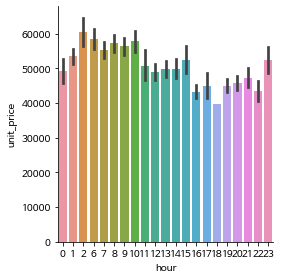

In [ ]:
sns.catplot(y='total_price', x='hour', data=nsc_df, kind='bar', height = 4, ax=ax[0,0])
sns.catplot(y='sales_amount', x='hour', data=nsc_df, kind='bar', height = 4, ax=ax[0,0])
sns.catplot(y='unit_price', x='hour', data=nsc_df, kind='bar', height = 4, ax=ax[0,0])

sns.catplot(y='total_price', x='hour', data=emy_df, kind='bar', height = 4, ax=ax[0,0])
sns.catplot(y='sales_amount', x='hour', data=emy_df, kind='bar', height = 4, ax=ax[0,0])
sns.catplot(y='unit_price', x='hour', data=emy_df, kind='bar', height = 4, ax=ax[0,0])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


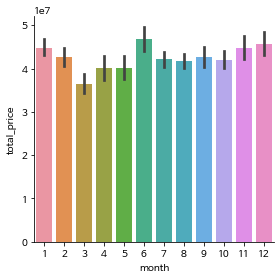

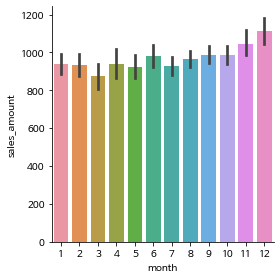

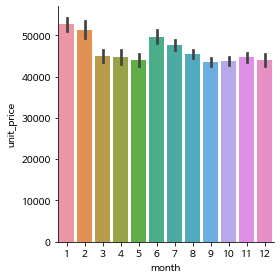

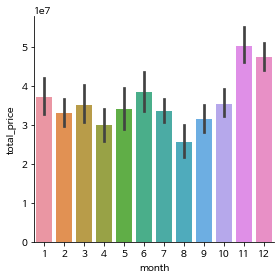

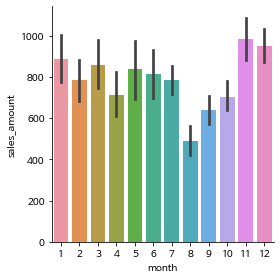

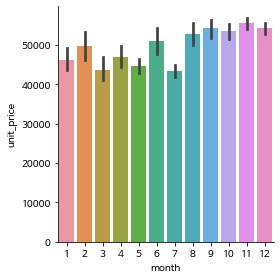

In [ ]:
sns.catplot(y='total_price', x='month', data=nsc_df, kind='bar', height = 4, ax=ax[0,0])
sns.catplot(y='sales_amount', x='month', data=nsc_df, kind='bar', height = 4, ax=ax[0,0])
sns.catplot(y='unit_price', x='month', data=nsc_df, kind='bar', height = 4, ax=ax[0,0])

sns.catplot(y='total_price', x='month', data=emy_df, kind='bar', height = 4, ax=ax[0,0])
sns.catplot(y='sales_amount', x='month', data=emy_df, kind='bar', height = 4, ax=ax[0,0])
sns.catplot(y='unit_price', x='month', data=emy_df, kind='bar', height = 4, ax=ax[0,0])